In [98]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

##### To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).

#### A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

#### Let X (the average cosmic-ray background in one day) be 5
#### Let Y (the average number of gamma-rays emitted in one day) be 10
##### For 1 day

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


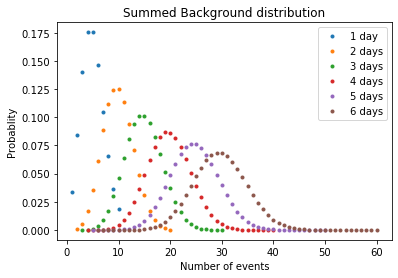

In [99]:
#1 day
mu=5
plt.xlabel("Number of events")
plt.ylabel("Probablity")
plt.title("Summed Background distribution")

x1 = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
d1= stats.poisson.pmf(x1, mu)
plt.plot(x1,d1, '.', ms=6, label='1 day')
print(x1)



#2 day
d2= np.convolve(d1,d1)
x2= np.linspace(2,20,19)
plt.plot(x2, d2, '.', ms=6, label='2 days')

#3 day
d3= np.convolve(d2,d1)
x3= np.linspace(3,30,28)
plt.plot(x3, d3, '.', ms=6, label='3 days')


#4 day
d4= np.convolve(d3,d1)
x4= np.linspace(4,40,37)
plt.plot(x4, d4, '.', ms=6, label='4 days')


#5 day
d5= np.convolve(d4,d1)
x5= np.linspace(5,50,46)
plt.plot(x5, d5, '.', ms=6, label='5 days')



#6 day
d6= np.convolve(d5,d1)
x6= np.linspace(6,60,55)
plt.plot(x6, d6, '.', ms=6, label='6 days')

plt.legend()



#### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.


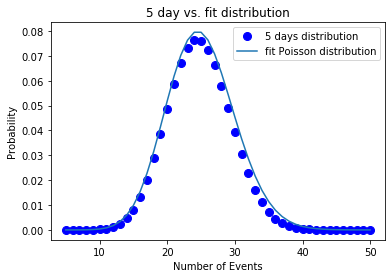

In [100]:
a=stats.poisson.pmf(x1, mu)
v=stats.poisson.pmf(x1, mu)
count=0

n=4
for i in range(n):
    v=np.convolve (a,v)
    count+=1
    
y= np.linspace(5,50,46)
plt.plot(y,v,'bo', ms=8, label='5 days distribution')

mu_fit=25
d= stats.poisson.pmf(y, mu_fit)
plt.plot(y,d,label='fit Poisson distribution')

plt.ylabel('Probability')
plt.xlabel('Number of Events')
plt.title('5 day vs. fit distribution')
plt.legend()


##### The plot above shows that the summed probability distribution matches with the fitted Poisson distribution.
##### Poisson distribution shows the probablity of number of random events occur in a specific duration of time. The summed probablity distribution shows the number of random events occur in a greater period of time, and thus should still be Poisson. 
##### In this case, the random variable is the number of background radiations in one day, which is a Poisson distrbution. When convolved, the random variable becomes the number of background radiations in five days, and should still be a Poissonn distribution.

#### C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

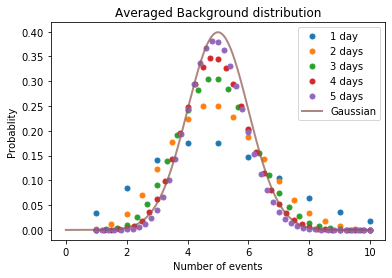

In [101]:
#1 day
mu=5
plt.xlabel("Number of events")
plt.ylabel("Probablity")
plt.title("Averaged Background distribution")

x1 = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))
d1= stats.poisson.pmf(x1, mu)
plt.plot(x1,d1, '.', ms=10, label='1 day')


#2 day
d2= np.convolve(d1,d1)*2
x2= np.linspace(1,10,19)
plt.plot(x2, d2, '.', ms=10, label='2 days')

#3 day
d3= np.convolve(d2,d1)*3/2
x3= np.linspace(1,10,28)
plt.plot(x3, d3, '.', ms=10, label='3 days')


#4 day
d4= np.convolve(d3,d1)*4/3
x4= np.linspace(1,10,37)
plt.plot(x4, d4, '.', ms=10, label='4 days')


#5 day
d5= np.convolve(d4,d1)*5/4
x5= np.linspace(1,10,46)
plt.plot(x5, d5, '.', ms=10, label='5 days')


#Gaussian
x = np.linspace(0,10,10000)
plt.plot(x,stats.norm.pdf(x,loc = 5., scale = 1),linewidth = 2,alpha = 0.7, label= 'Gaussian')
plt.legend()

##### The shape of the distribution approaches Gaussian distribution as the number of days becomes larger. This is because the data sample size increases as numbers of days becomes larger. This corresponds to the central limit theorm, which states as the sample size gets bigger, the distribution will approach a Gaussian distribution.

##### 

#### D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

##### Let Y=10,N=8

In [102]:
mu=5
x1 = np.arange(stats.poisson.ppf(0.01, mu),
              stats.poisson.ppf(0.99, mu))

a=stats.poisson.pmf(x1, mu)
v=stats.poisson.pmf(x1, mu)
count=0

N=8
Y=10
for i in range(N):
    v=np.convolve (a,v)
    count+=1
   
y = np.linspace(1,10,len(v))

mean = np.average(y,weights=v)
stats.norm.ppf(stats.poisson.cdf(10,mean))
#plt.plot(y,v,'bo', ms=1, label='poisson pmf')


2.2361513013794907

##### sigma is 2.24

#### 2.Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.
#### A) Show how the distribution changes as you average over more observing intervals

0.14204111792688656


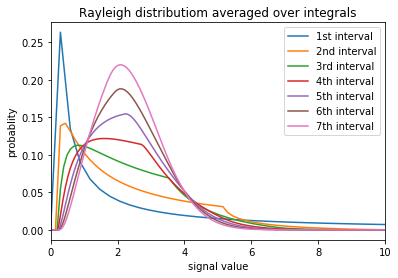

In [103]:
#interval 1
x1 = np.linspace(0,10,35) 

l1= stats.lognorm.pdf(x1, 5)
plt.plot(x1,l1, label='1st interval')


#interval 2
l2= np.convolve(l1,l1)*2
x2= np.linspace(0,10, len(l2))
plt.plot(x2, l2, label='2nd interval')

#interval 3
l3= np.convolve(l2,l1)*3/2
x3= np.linspace(0,10, len(l3))
plt.plot(x3, l3, label='3rd interval')

#interval 4
l4= np.convolve(l3,l1)*4/3
x4= np.linspace(0,10, len(l4))
plt.plot(x4, l4, label='4th interval')


#interval 5
l5= np.convolve(l4,l1)*5/4
x5= np.linspace(0,10, len(l5))
plt.plot(x5, l5,label='5th interval')

#interval 6
l6= np.convolve(l5,l1)*6/5
x6= np.linspace(0,10, len(l6))
plt.plot(x6, l6,label='6th interval')

#interval 7
l7= np.convolve(l6,l1)*7/6
x7= np.linspace(0,10, len(l7))
plt.plot(x7, l7,label='7th interval')



plt.legend()


plt.xlim(0,10)
plt.title('Rayleigh distributiom averaged over integrals')
plt.ylabel('probablity')
plt.xlabel('signal value')
print(max(l2))




##### Distribution approaches Gaussiam as average over more observing intervals

#### B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

##### The shape approaches a Gaussian distribution after averaging 7 intervals 

#### 3. A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

##### Version 1: Let X =1.5, Y=7.8

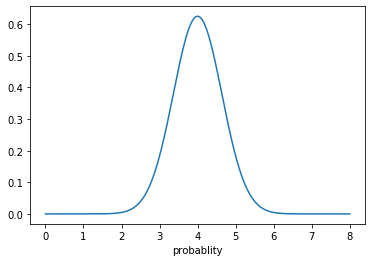

The sigma of the sinal is 5.95 on normal distribution, so this can be claimed as a discovery.


In [104]:
X=1.5 #width of Gaussian
Y=7.8
sigma=X/2.35
x=np.linspace(0,8,1000)
g=stats.norm.pdf(x,4,sigma)

plt.xlabel("strength of signal")
plt.xlabel("probablity")
plt.plot(x,g)
plt.show()

print(f'The sigma of the sinal is {stats.norm.ppf(stats.norm.cdf(Y,4,sigma)):.2f} on normal distribution, so this can be claimed as a discovery.')
 

#### B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

##### Version 2
##### Statistical Question: What is the probablity  detecting signal with strength equal to or greater than 7.8 in the 10k pixels CCDs?

#### C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [105]:
Y=7.8
p=(1-(stats.norm.cdf(Y,4,sigma)))*10000
print(f'The probablity of detecting signal with strength equal to or greater than 7.8 in the 10k pixels CCDs is {p:0.6f} ')


The probablity of detecting signal with strength equal to or greater than 7.8 in the 10k pixels CCDs is 0.000013 


#### 4.A) Calculate the signal required for a 5-sigma detection in Version 1

In [106]:
s5 = 1-stats.norm.cdf(5)
signal = stats.norm.ppf(1-s5 ,4, scale=sigma)
print(f'For a 5-sigma detection, the signal must have strength equal or greater than {signal:0.2f}')


For a 5-sigma detection, the signal must have strength equal or greater than 7.19


#### B) Calculate the signal required for a 5-sigma detection in Version 2


In [107]:
signal2 = stats.norm.ppf(1-s5/10000 ,4, scale=sigma)
print(f'For a 5-sigma detection in Version 2, the signal must have strength equal or greater than {signal2:0.2f}')


For a 5-sigma detection in Version 2, the signal must have strength equal or greater than 8.18


#### C) Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.


In [108]:
print(f'The signal must be {(signal2/signal):.2f} brighter if there is a trail factor of 10k.')
print('The sensitivity penalty due to trials factor is low because the probablity at the tail of the distribution is extremely small.')
print('So that even when the number of pixels is increased by 10k times, value of the signal does not change much.')

The signal must be 1.14 brighter if there is a trail factor of 10k.
The sensitivity penalty due to trials factor is low because the probablity at the tail of the distribution is extremely small.
So that even when the number of pixels is increased by 10k times, value of the signal does not change much.


#### D) If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?


In [109]:
signal3 = stats.norm.ppf(1-s5/1e9,4, scale=sigma)
print(f'If the trails factor is 1e9, the required signal brightness increase to {signal3:0.2f}, which is {(signal3/signal):0.2f} brighter than the initial brightness.')
print('When the trails factor is changed significantly, the effect on the 5-sigma sensitivity threshold is relatively small.')

If the trails factor is 1e9, the required signal brightness increase to 9.16, which is 1.27 brighter than the initial brightness.
When the trails factor is changed significantly, the effect on the 5-sigma sensitivity threshold is relatively small.


In [111]:
!jupyter nbconvert --to html Lab2report.ipynb

[NbConvertApp] Converting notebook Lab2report.ipynb to html
[NbConvertApp] Writing 480487 bytes to Lab2report.html
